連接雲端硬碟

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ta import add_all_ta_features
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

設定開啟檔案路徑

In [27]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/2025_tvdi_ML/tsmc2330-1.csv')


# 資料預先處理
1.資料清洗
- 前置處理工作
- 缺失值處理
- 重複值處理
- 異常值處理
2.資料檢查
- 資料範圍檢查
- 資料格式檢查

資料讀取預覽


In [ ]:
df.head(1313)

,Column1,Date,Open,High,Low,Close,Volume,Return,MA5,MA10,MA20,Price_Change,RSI,MACD,MACD_Signal,BB_Upper,BB_Lower,Target
0,19,2020/2/7,298.235036,298.686908,294.620066,296.427551,28798327,-1.35,294.258600,295.071942,299.997342,-1.807485,43.065737,-1.508643,-1.431600,315.071159,284.923525,0
1,20,2020/2/10,290.553192,296.427518,290.101321,295.975647,30632424,-0.15,296.517938,294.439319,299.477689,5.422455,41.044731,-1.420512,-1.429362,314.341801,284.613577,0
2,21,2020/2/11,298.686925,300.494410,298.235054,299.590668,27524935,1.22,297.692786,294.303763,299.116191,0.903743,42.753644,-1.092871,-1.361563,313.574510,284.657872,1
3,22,2020/2/12,301.398109,303.657466,300.946238,302.753723,37612639,1.06,299.048401,294.484512,299.251747,1.355614,41.911724,-0.610923,-1.210544,313.797212,284.706282,1
4,23,2020/2/13,305.464950,305.464950,302.753723,302.753723,22757021,0.00,299.500262,296.156436,299.500276,-2.711227,45.967695,-0.229394,-1.013383,314.109803,284.890749,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,1307,2025/5/27,971.000000,975.000000,961.000000,965.000000,26355315,-1.13,979.400000,984.900000,959.400000,-6.000000,61.349693,18.121109,17.890692,1021.704515,897.095485,0
1289,1308,2025/5/28,984.000000,985.000000,967.000000,967.000000,26471533,0.21,974.800000,981.700000,962.650000,-17.000000,65.806452,16.464413,17.605436,1018.827444,906.472556,1
1290,1309,2025/5/29,986.000000,986.000000,967.000000,967.000000,48602590,0.00,971.800000,979.100000,965.600000,-19.000000,57.258065,14.978804,17.080110,1015.544812,915.655188,0
1291,1310,2025/6/2,958.000000,961.000000,946.000000,946.000000,33676511,-2.17,964.200000,973.900000,965.400000,-12.000000,45.985401,11.968953,16.057879,1015.639008,915.160992,0


取得資料集的資料摘要

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Column1       1293 non-null   int64  
 1   Date          1293 non-null   object 
 2   Open          1293 non-null   float64
 3   High          1293 non-null   float64
 4   Low           1293 non-null   float64
 5   Close         1293 non-null   float64
 6   Volume        1293 non-null   int64  
 7   Return        1293 non-null   float64
 8   MA5           1293 non-null   float64
 9   MA10          1293 non-null   float64
 10  MA20          1293 non-null   float64
 11  Price_Change  1293 non-null   float64
 12  RSI           1293 non-null   float64
 13  MACD          1293 non-null   float64
 14  MACD_Signal   1293 non-null   float64
 15  BB_Upper      1293 non-null   float64
 16  BB_Lower      1293 non-null   float64
 17  Target        1293 non-null   int64  
dtypes: float64(14), int64(3), ob

取得資料集的敘述性統計數據: 數據分佈的集中趨勢、分散狀態和形狀，(不包含空值)。

In [ ]:
df.describe()

,Column1,Open,High,Low,Close,Volume,Return,MA5,MA10,MA20,Price_Change,RSI,MACD,MACD_Signal,BB_Upper,BB_Lower,Target
count,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1.293000e+03,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000
mean,665.000000,598.167320,602.647212,593.261381,597.876211,3.641501e+07,0.106783,596.858889,595.549026,592.932956,-0.291110,53.450762,3.513029,3.462868,629.242960,556.622952,0.486466
std,373.401259,217.742813,219.816798,215.905381,217.747986,2.090993e+07,1.889767,217.346931,216.885792,215.823235,7.146125,16.732702,12.822760,12.064012,230.781290,202.556379,0.500010
min,19.000000,229.954220,230.866737,214.897694,226.304153,0.000000e+00,-9.980000,236.510290,242.813681,248.650068,-36.828350,6.666781,-47.834610,-39.928779,267.123004,218.755947,0.000000
25%,342.000000,473.941292,477.633272,470.278165,473.531006,2.250151e+07,-0.930000,472.985791,472.269153,466.826527,-3.801458,41.176509,-3.138499,-2.971861,501.030155,439.658069,0.000000
50%,665.000000,548.727081,552.878174,544.558777,549.277466,3.194178e+07,0.000000,549.310620,549.785785,550.406886,0.000000,52.678749,2.618550,2.650522,573.259220,522.198066,0.000000
75%,988.000000,625.707287,631.064884,619.420765,625.488464,4.323142e+07,1.100000,627.483765,620.366565,612.186508,2.899694,65.531915,10.304376,10.113208,648.611317,577.230496,1.000000
max,1311.000000,1144.664906,1154.618514,1129.734497,1129.734497,1.663077e+08,9.970000,1114.804077,1106.343506,1100.869019,41.000000,100.000000,44.296141,39.996126,1141.822776,1062.035825,1.000000


## 以AI生成Python程式碼：J.W.TUKEY

 ## 9.2 邏輯回歸演算法之應用:判斷台積電漲跌

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("/content/drive/MyDrive/2025_tvdi_ML/tsmc2330-1.csv")
df

,Column1,Date,Open,High,Low,Close,Volume,Return,MA5,MA10,MA20,Price_Change,RSI,MACD,MACD_Signal,BB_Upper,BB_Lower,Target
0,19,2020/2/7,298.235036,298.686908,294.620066,296.427551,28798327,-1.35,294.258600,295.071942,299.997342,-1.807485,43.065737,-1.508643,-1.431600,315.071159,284.923525,0
1,20,2020/2/10,290.553192,296.427518,290.101321,295.975647,30632424,-0.15,296.517938,294.439319,299.477689,5.422455,41.044731,-1.420512,-1.429362,314.341801,284.613577,0
2,21,2020/2/11,298.686925,300.494410,298.235054,299.590668,27524935,1.22,297.692786,294.303763,299.116191,0.903743,42.753644,-1.092871,-1.361563,313.574510,284.657872,1
3,22,2020/2/12,301.398109,303.657466,300.946238,302.753723,37612639,1.06,299.048401,294.484512,299.251747,1.355614,41.911724,-0.610923,-1.210544,313.797212,284.706282,1
4,23,2020/2/13,305.464950,305.464950,302.753723,302.753723,22757021,0.00,299.500262,296.156436,299.500276,-2.711227,45.967695,-0.229394,-1.013383,314.109803,284.890749,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,1307,2025/5/27,971.000000,975.000000,961.000000,965.000000,26355315,-1.13,979.400000,984.900000,959.400000,-6.000000,61.349693,18.121109,17.890692,1021.704515,897.095485,0
1289,1308,2025/5/28,984.000000,985.000000,967.000000,967.000000,26471533,0.21,974.800000,981.700000,962.650000,-17.000000,65.806452,16.464413,17.605436,1018.827444,906.472556,1
1290,1309,2025/5/29,986.000000,986.000000,967.000000,967.000000,48602590,0.00,971.800000,979.100000,965.600000,-19.000000,57.258065,14.978804,17.080110,1015.544812,915.655188,0
1291,1310,2025/6/2,958.000000,961.000000,946.000000,946.000000,33676511,-2.17,964.200000,973.900000,965.400000,-12.000000,45.985401,11.968953,16.057879,1015.639008,915.160992,0


In [18]:
# prompt: 使用 DataFrame df: 附檔是我的資料集，我想用邏輯回歸演算法預測台積電股價漲跌，再評估演算法的precison, recall, f1-score, support的數值。

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define features (X) and target (y)
# Exclude 'Date' and 'Column1' as they are not suitable for direct use in logistic regression
X = df.drop(['Date', 'Column1', 'Target'], axis=1)
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model using classification_report
report = classification_report(y_test, y_pred)

# Print the classification report
report

'              precision    recall  f1-score   support\n\n           0       0.74      0.85      0.79       188\n           1       0.84      0.71      0.77       200\n\n    accuracy                           0.78       388\n   macro avg       0.79      0.78      0.78       388\nweighted avg       0.79      0.78      0.78       388\n'

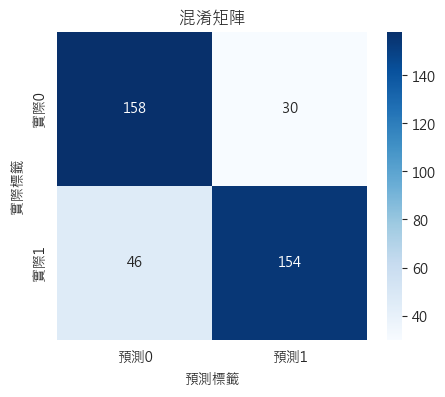

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 先設定 matplotlib 的中文字型（以 Windows 微軟正黑體為例）
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 或 'SimHei'，視你系統字型而定
plt.rcParams['axes.unicode_minus'] = False  # 讓負號正常顯示

# 2. 在設定 seaborn 風格時，再指定字型（必須在 import seaborn 後執行）
sns.set_style("whitegrid", {"font.sans-serif": ['Microsoft JhengHei', 'Arial']})

# 3. 混淆矩陣數據
cm = np.array([[158, 30],
               [46, 154]])

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['預測0', '預測1'], yticklabels=['實際0', '實際1'])
plt.xlabel('預測標籤')
plt.ylabel('實際標籤')
plt.title('混淆矩陣')
plt.show()


<Figure size 800x400 with 0 Axes>

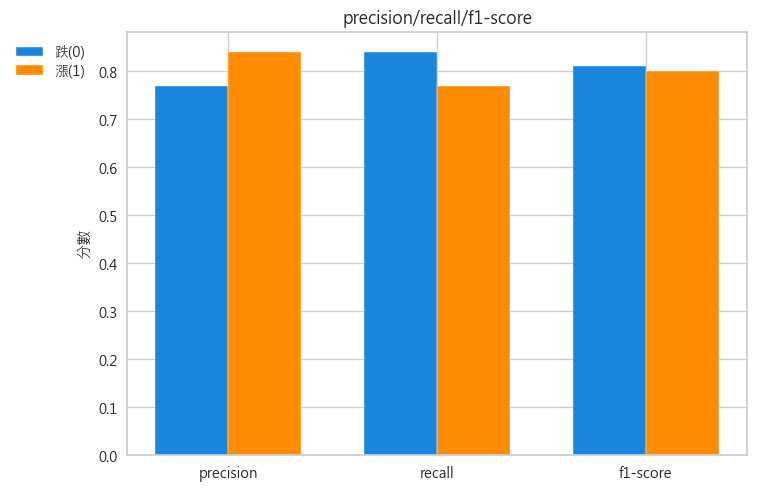

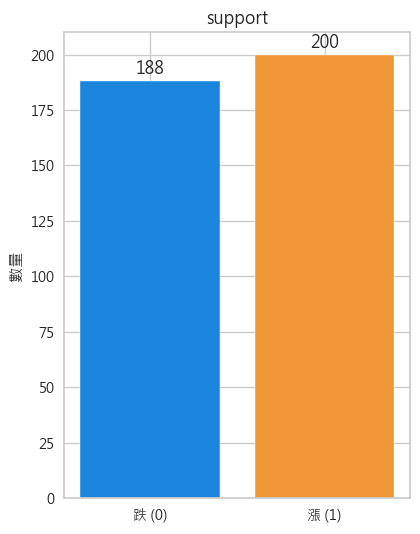

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['precision', 'recall', 'f1-score']
class0 = [0.77, 0.84, 0.81]
class1 = [0.84, 0.77, 0.80]
support = [188, 200]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8,4))

# 第一張：分數指標
import matplotlib.pyplot as plt
import numpy as np

labels = ['precision', 'recall', 'f1-score']
class0 = [0.77, 0.84, 0.81]
class1 = [0.84, 0.77, 0.80]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, class0, width, label='跌(0)', color='#1985DD')
bars2 = ax.bar(x + width/2, class1, width, label='漲(1)', color='#FF8C00')

# 調整圖例位置，往左移至第一個長條上方附近
ax.legend(loc='upper left', bbox_to_anchor=(-0.2, 1.0), labelspacing=0.2)

ax.set_ylabel('分數')
ax.set_title('precision/recall/f1-score')
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.show()


# 第二張：support
plt.subplot(1,2,2)
plt.bar(['跌 (0)', '漲 (1)'], support, color=['#1985DD', '#EE9536'])
plt.ylabel('數量')
plt.title('support')
for i, v in enumerate(support):
    plt.text(i, v+3, str(v), ha='center')

plt.tight_layout()
plt.show()


# 6.5 使用Pandas 進行特徵選擇

特徵工程：加入技術指標 (MA5, MA10, MA20, BSI BB band.), 將漲、跌欄位改為 0(跌), 1(漲)，並放在最後一欄顯示

## 6.5.2 皮爾森(Pearson) 相關係數

In [3]:
import pandas as pd
df = pd.read_csv('tsmc2330-1.csv')
df

,Column1,Date,Open,High,Low,Close,Volume,Return,MA5,MA10,MA20,Price_Change,RSI,MACD,MACD_Signal,BB_Upper,BB_Lower,Target
0,19,2020/2/7,298.235036,298.686908,294.620066,296.427551,28798327,-1.35,294.258600,295.071942,299.997342,-1.807485,43.065737,-1.508643,-1.431600,315.071159,284.923525,0
1,20,2020/2/10,290.553192,296.427518,290.101321,295.975647,30632424,-0.15,296.517938,294.439319,299.477689,5.422455,41.044731,-1.420512,-1.429362,314.341801,284.613577,0
2,21,2020/2/11,298.686925,300.494410,298.235054,299.590668,27524935,1.22,297.692786,294.303763,299.116191,0.903743,42.753644,-1.092871,-1.361563,313.574510,284.657872,1
3,22,2020/2/12,301.398109,303.657466,300.946238,302.753723,37612639,1.06,299.048401,294.484512,299.251747,1.355614,41.911724,-0.610923,-1.210544,313.797212,284.706282,1
4,23,2020/2/13,305.464950,305.464950,302.753723,302.753723,22757021,0.00,299.500262,296.156436,299.500276,-2.711227,45.967695,-0.229394,-1.013383,314.109803,284.890749,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,1307,2025/5/27,971.000000,975.000000,961.000000,965.000000,26355315,-1.13,979.400000,984.900000,959.400000,-6.000000,61.349693,18.121109,17.890692,1021.704515,897.095485,0
1289,1308,2025/5/28,984.000000,985.000000,967.000000,967.000000,26471533,0.21,974.800000,981.700000,962.650000,-17.000000,65.806452,16.464413,17.605436,1018.827444,906.472556,1
1290,1309,2025/5/29,986.000000,986.000000,967.000000,967.000000,48602590,0.00,971.800000,979.100000,965.600000,-19.000000,57.258065,14.978804,17.080110,1015.544812,915.655188,0
1291,1310,2025/6/2,958.000000,961.000000,946.000000,946.000000,33676511,-2.17,964.200000,973.900000,965.400000,-12.000000,45.985401,11.968953,16.057879,1015.639008,915.160992,0


In [ ]:
# 查看資料分布狀況
df.describe()

,Column1,Open,High,Low,Close,Volume,Return,MA5,MA10,MA20,Price_Change,RSI,MACD,MACD_Signal,BB_Upper,BB_Lower,Target
count,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1.293000e+03,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000
mean,665.000000,598.167320,602.647212,593.261381,597.876211,3.641501e+07,0.106783,596.858889,595.549026,592.932956,-0.291110,53.450762,3.513029,3.462868,629.242960,556.622952,0.486466
std,373.401259,217.742813,219.816798,215.905381,217.747986,2.090993e+07,1.889767,217.346931,216.885792,215.823235,7.146125,16.732702,12.822760,12.064012,230.781290,202.556379,0.500010
min,19.000000,229.954220,230.866737,214.897694,226.304153,0.000000e+00,-9.980000,236.510290,242.813681,248.650068,-36.828350,6.666781,-47.834610,-39.928779,267.123004,218.755947,0.000000
25%,342.000000,473.941292,477.633272,470.278165,473.531006,2.250151e+07,-0.930000,472.985791,472.269153,466.826527,-3.801458,41.176509,-3.138499,-2.971861,501.030155,439.658069,0.000000
50%,665.000000,548.727081,552.878174,544.558777,549.277466,3.194178e+07,0.000000,549.310620,549.785785,550.406886,0.000000,52.678749,2.618550,2.650522,573.259220,522.198066,0.000000
75%,988.000000,625.707287,631.064884,619.420765,625.488464,4.323142e+07,1.100000,627.483765,620.366565,612.186508,2.899694,65.531915,10.304376,10.113208,648.611317,577.230496,1.000000
max,1311.000000,1144.664906,1154.618514,1129.734497,1129.734497,1.663077e+08,9.970000,1114.804077,1106.343506,1100.869019,41.000000,100.000000,44.296141,39.996126,1141.822776,1062.035825,1.000000


In [4]:
#  選擇特徵與目標變數
features2 = df.drop(columns=["Column1", "Date"])
X = features2
y = df["Target"]

### 做特徵變數分析，請採用pearson's的關係係數分析

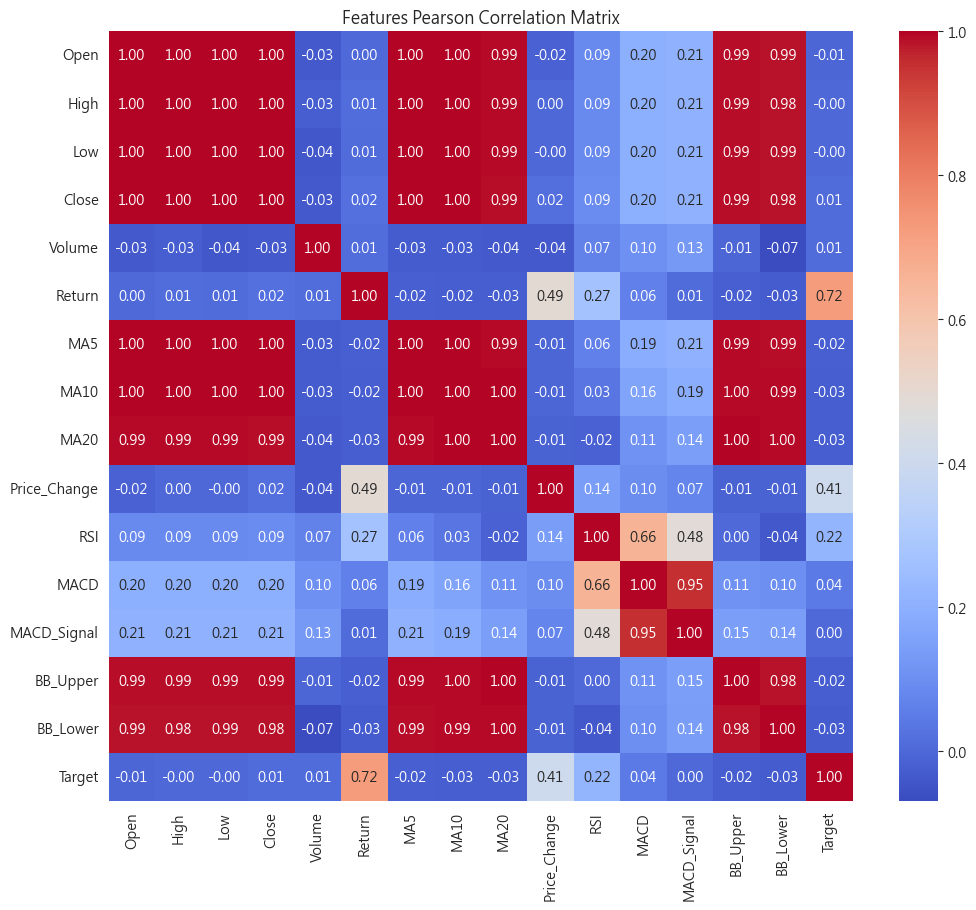

In [5]:
# prompt: 請使用上方features2特徵變數，做pearson's的關係係數分析，並產生熱力圖。

import matplotlib.pyplot as plt
# 計算皮爾森相關係數矩陣
correlation_matrix = features2.corr(method='pearson')

# 產生熱力圖

# 1. 先設定 matplotlib 的中文字型（以 Windows 微軟正黑體為例）
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 或 'SimHei'，視你系統字型而定
#plt.rcParams['axes.unicode_minus'] = False  # 讓負號正常顯示

# 2. 在設定 seaborn 風格時，再指定字型（必須在 import seaborn 後執行）
sns.set_style("whitegrid", {"font.sans-serif": ['Microsoft JhengHei', 'Arial']})

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Features Pearson Correlation Matrix')
plt.show()

# 最新一次 邏輯回歸演算法 執行

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("tsmc2330-2_Robust.csv")
df

,Column1,Date,Open,High,Low,Close,Volume,Return,MA5,MA10,MA20,Price_Change,RSI,MACD,MACD_Signal,BB_Upper,BB_Lower,Target
0,19,2020/2/7,-1.650515,-1.656707,-1.675837,-1.663952,-0.151639,-0.665025,-1.650844,-1.719907,-1.722686,-0.269728,-0.394697,-0.307017,-0.311968,-1.749465,-1.724725,0
1,20,2020/2/10,-1.701131,-1.671433,-1.706135,-1.666926,-0.063163,-0.073892,-1.636220,-1.724179,-1.726261,0.809183,-0.477677,-0.300461,-0.311797,-1.754407,-1.726978,0
2,21,2020/2/11,-1.647537,-1.644927,-1.651599,-1.643136,-0.213066,0.600985,-1.628616,-1.725094,-1.728747,0.134864,-0.407511,-0.276088,-0.306616,-1.759606,-1.726656,1
3,22,2020/2/12,-1.629673,-1.624311,-1.633420,-1.622321,0.273559,0.522167,-1.619841,-1.723874,-1.727815,0.202296,-0.442079,-0.240237,-0.295074,-1.758097,-1.726304,1
4,23,2020/2/13,-1.602876,-1.612531,-1.621301,-1.622321,-0.443068,0.000000,-1.616917,-1.712585,-1.726105,-0.404591,-0.275547,-0.211855,-0.280007,-1.755979,-1.724963,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,1307,2025/5/27,2.782395,2.751205,2.792235,2.735782,-0.269488,-0.556650,2.783787,2.938027,2.813657,-0.895369,0.356017,1.153217,1.164699,3.038635,2.725091,0
1289,1308,2025/5/28,2.868053,2.816381,2.832465,2.748944,-0.263882,0.103448,2.754013,2.916420,2.836015,-2.536877,0.539006,1.029978,1.142899,3.019140,2.793252,1
1290,1309,2025/5/29,2.881231,2.822898,2.832465,2.748944,0.803709,0.000000,2.734595,2.898864,2.856310,-2.835334,0.188021,0.919465,1.102752,2.996897,2.860000,0
1291,1310,2025/6/2,2.696737,2.659959,2.691660,2.610747,0.083682,-1.068966,2.685403,2.863752,2.854934,-1.790737,-0.274820,0.695566,1.024630,2.997536,2.856408,0


### 6.5.2 皮爾森(Pearson) 相關係數

In [6]:
import pandas as pd
df = pd.read_csv('tsmc2330-2_Robust.csv')
df

,Column1,Date,Open,High,Low,Close,Volume,Return,MA5,MA10,MA20,Price_Change,RSI,MACD,MACD_Signal,BB_Upper,BB_Lower,Target
0,19,2020/2/7,-1.650515,-1.656707,-1.675837,-1.663952,-0.151639,-0.665025,-1.650844,-1.719907,-1.722686,-0.269728,-0.394697,-0.307017,-0.311968,-1.749465,-1.724725,0
1,20,2020/2/10,-1.701131,-1.671433,-1.706135,-1.666926,-0.063163,-0.073892,-1.636220,-1.724179,-1.726261,0.809183,-0.477677,-0.300461,-0.311797,-1.754407,-1.726978,0
2,21,2020/2/11,-1.647537,-1.644927,-1.651599,-1.643136,-0.213066,0.600985,-1.628616,-1.725094,-1.728747,0.134864,-0.407511,-0.276088,-0.306616,-1.759606,-1.726656,1
3,22,2020/2/12,-1.629673,-1.624311,-1.633420,-1.622321,0.273559,0.522167,-1.619841,-1.723874,-1.727815,0.202296,-0.442079,-0.240237,-0.295074,-1.758097,-1.726304,1
4,23,2020/2/13,-1.602876,-1.612531,-1.621301,-1.622321,-0.443068,0.000000,-1.616917,-1.712585,-1.726105,-0.404591,-0.275547,-0.211855,-0.280007,-1.755979,-1.724963,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,1307,2025/5/27,2.782395,2.751205,2.792235,2.735782,-0.269488,-0.556650,2.783787,2.938027,2.813657,-0.895369,0.356017,1.153217,1.164699,3.038635,2.725091,0
1289,1308,2025/5/28,2.868053,2.816381,2.832465,2.748944,-0.263882,0.103448,2.754013,2.916420,2.836015,-2.536877,0.539006,1.029978,1.142899,3.019140,2.793252,1
1290,1309,2025/5/29,2.881231,2.822898,2.832465,2.748944,0.803709,0.000000,2.734595,2.898864,2.856310,-2.835334,0.188021,0.919465,1.102752,2.996897,2.860000,0
1291,1310,2025/6/2,2.696737,2.659959,2.691660,2.610747,0.083682,-1.068966,2.685403,2.863752,2.854934,-1.790737,-0.274820,0.695566,1.024630,2.997536,2.856408,0


In [7]:
# 查看資料分布狀況
df.describe()

,Column1,Open,High,Low,Close,Volume,Return,MA5,MA10,MA20,Price_Change,RSI,MACD,MACD_Signal,BB_Upper,BB_Lower,Target
count,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000
mean,665.000000,0.325766,0.324373,0.326551,0.319818,0.215786,0.052602,0.307760,0.309008,0.292557,-0.043442,0.031698,0.066539,0.062082,0.379342,0.250231,0.486466
std,373.401259,1.434727,1.432670,1.447644,1.432954,1.008684,0.930920,1.406795,1.464481,1.484750,1.066402,0.687022,0.953870,0.921968,1.563758,1.472362,0.500010
min,19.000000,-2.100423,-2.098729,-2.210375,-2.125419,-1.540855,-4.916256,-2.024624,-2.072772,-2.075928,-5.495824,-1.889189,-3.753152,-3.254037,-2.074358,-2.205690,0.000000
25%,342.000000,-0.492770,-0.490413,-0.498051,-0.498471,-0.455394,-0.458128,-0.494018,-0.523417,-0.574989,-0.567284,-0.472266,-0.428260,-0.429679,-0.489419,-0.599975,0.000000
50%,665.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,988.000000,0.507230,0.509587,0.501949,0.501529,0.544606,0.541872,0.505982,0.476583,0.425011,0.432716,0.527734,0.571740,0.570321,0.510581,0.400025,1.000000
max,1311.000000,3.926689,3.921880,3.923599,3.819865,6.481745,4.911330,3.660200,3.758052,3.786889,6.118352,1.942946,3.100348,2.854062,3.852548,3.924026,1.000000


In [10]:
#  選擇特徵與目標變數
features2 = df.drop(columns=["Column1", "Date"])
X = features2
y = df["Target"]

### 做特徵變數分析，請採用pearson's的關係係數分析

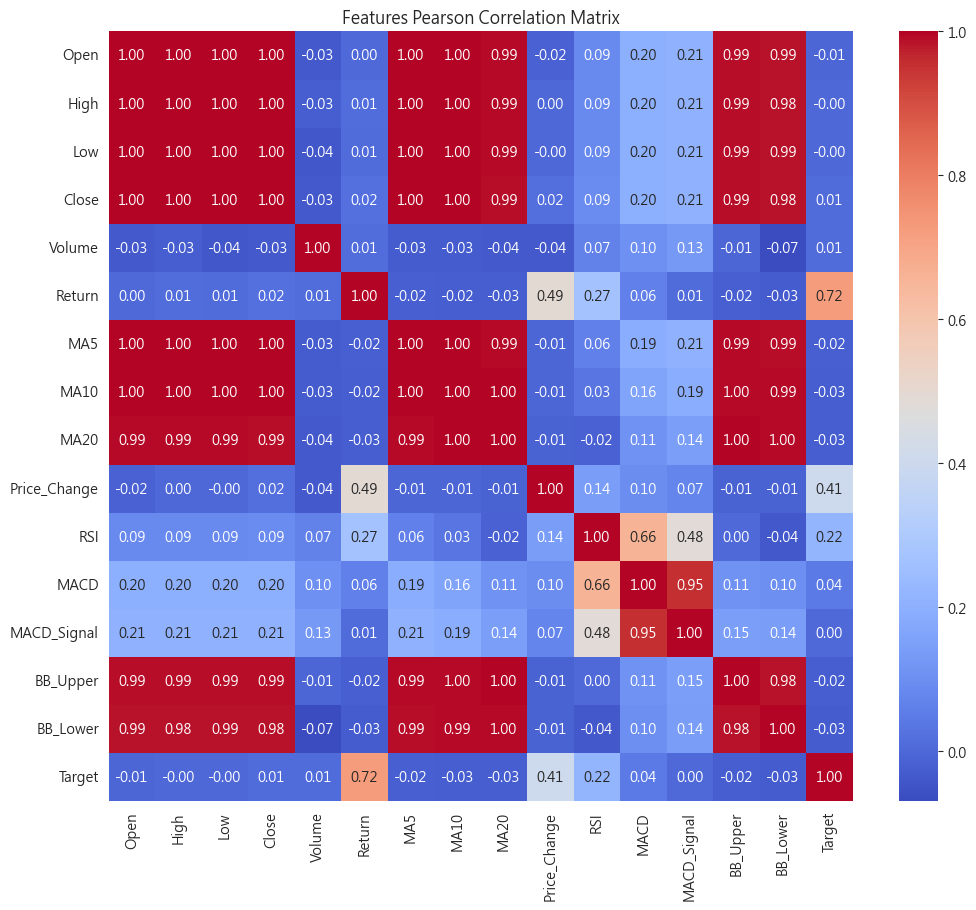

In [13]:
# prompt: 請使用上方features2特徵變數，做pearson's的關係係數分析，並產生熱力圖。

import matplotlib.pyplot as plt
# 計算皮爾森相關係數矩陣
correlation_matrix = features2.corr(method='pearson')

# 產生熱力圖

# 1. 先設定 matplotlib 的中文字型（以 Windows 微軟正黑體為例）
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 或 'SimHei'，視你系統字型而定
#plt.rcParams['axes.unicode_minus'] = False  # 讓負號正常顯示

# 2. 在設定 seaborn 風格時，再指定字型（必須在 import seaborn 後執行）
sns.set_style("whitegrid", {"font.sans-serif": ['Microsoft JhengHei', 'Arial']})

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Features Pearson Correlation Matrix')
plt.show()

 ### 9.2 邏輯回歸演算法之應用:判斷台積電漲跌

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("tsmc2330-2_Robust.csv")
df

,Column1,Date,Open,High,Low,Close,Volume,Return,MA5,MA10,MA20,Price_Change,RSI,MACD,MACD_Signal,BB_Upper,BB_Lower,Target
0,19,2020/2/7,-1.650515,-1.656707,-1.675837,-1.663952,-0.151639,-0.665025,-1.650844,-1.719907,-1.722686,-0.269728,-0.394697,-0.307017,-0.311968,-1.749465,-1.724725,0
1,20,2020/2/10,-1.701131,-1.671433,-1.706135,-1.666926,-0.063163,-0.073892,-1.636220,-1.724179,-1.726261,0.809183,-0.477677,-0.300461,-0.311797,-1.754407,-1.726978,0
2,21,2020/2/11,-1.647537,-1.644927,-1.651599,-1.643136,-0.213066,0.600985,-1.628616,-1.725094,-1.728747,0.134864,-0.407511,-0.276088,-0.306616,-1.759606,-1.726656,1
3,22,2020/2/12,-1.629673,-1.624311,-1.633420,-1.622321,0.273559,0.522167,-1.619841,-1.723874,-1.727815,0.202296,-0.442079,-0.240237,-0.295074,-1.758097,-1.726304,1
4,23,2020/2/13,-1.602876,-1.612531,-1.621301,-1.622321,-0.443068,0.000000,-1.616917,-1.712585,-1.726105,-0.404591,-0.275547,-0.211855,-0.280007,-1.755979,-1.724963,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,1307,2025/5/27,2.782395,2.751205,2.792235,2.735782,-0.269488,-0.556650,2.783787,2.938027,2.813657,-0.895369,0.356017,1.153217,1.164699,3.038635,2.725091,0
1289,1308,2025/5/28,2.868053,2.816381,2.832465,2.748944,-0.263882,0.103448,2.754013,2.916420,2.836015,-2.536877,0.539006,1.029978,1.142899,3.019140,2.793252,1
1290,1309,2025/5/29,2.881231,2.822898,2.832465,2.748944,0.803709,0.000000,2.734595,2.898864,2.856310,-2.835334,0.188021,0.919465,1.102752,2.996897,2.860000,0
1291,1310,2025/6/2,2.696737,2.659959,2.691660,2.610747,0.083682,-1.068966,2.685403,2.863752,2.854934,-1.790737,-0.274820,0.695566,1.024630,2.997536,2.856408,0


In [15]:
# prompt: 使用 DataFrame df: 附檔是我的資料集，我想用邏輯回歸演算法預測台積電股價漲跌，再評估演算法的precison, recall, f1-score, support的數值。

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define features (X) and target (y)
# Exclude 'Date' and 'Column1' as they are not suitable for direct use in logistic regression
X = df.drop(['Date', 'Column1', 'Target'], axis=1)
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model using classification_report
report = classification_report(y_test, y_pred)

# Print the classification report
report

'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.98       188\n           1       1.00      0.97      0.98       200\n\n    accuracy                           0.98       388\n   macro avg       0.98      0.98      0.98       388\nweighted avg       0.99      0.98      0.98       388\n'

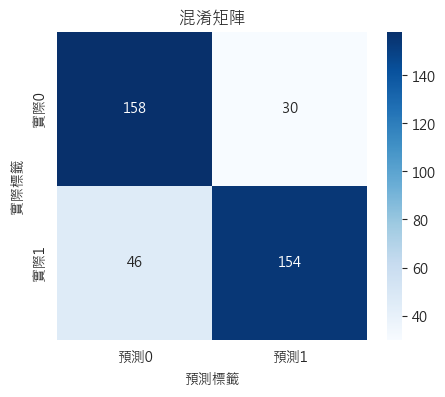

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 先設定 matplotlib 的中文字型（以 Windows 微軟正黑體為例）
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 或 'SimHei'，視你系統字型而定
plt.rcParams['axes.unicode_minus'] = False  # 讓負號正常顯示

# 2. 在設定 seaborn 風格時，再指定字型（必須在 import seaborn 後執行）
sns.set_style("whitegrid", {"font.sans-serif": ['Microsoft JhengHei', 'Arial']})

# 3. 混淆矩陣數據
cm = np.array([[158, 30],
               [46, 154]])

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['預測0', '預測1'], yticklabels=['實際0', '實際1'])
plt.xlabel('預測標籤')
plt.ylabel('實際標籤')
plt.title('混淆矩陣')
plt.show()

d:\Github\Python-2025_04_25\MLOPS\mlops_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Github\Python-2025_04_25\MLOPS\mlops_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Github\Python-2025_04_25\MLOPS\mlops_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36300 (\N{CJK UNIFIED IDEOGRAPH-8DCC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Github\Python-2025_04_25\MLOPS\mlops_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28466 (\N{CJK UNIFIED IDEOGRAPH-6F32}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


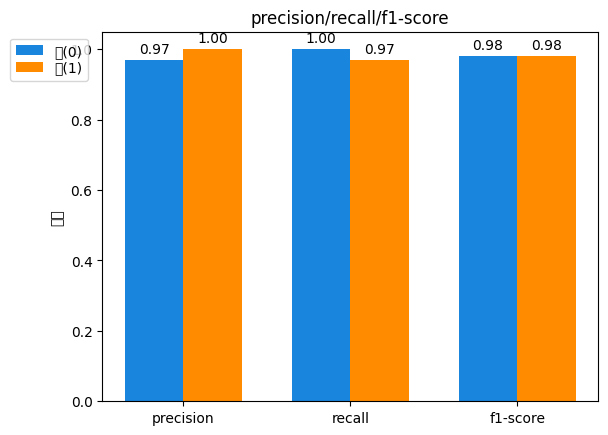

NameError: name 'support' is not defined

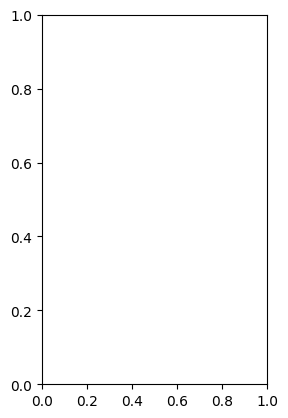

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# labels = ['precision', 'recall', 'f1-score']
# class0 = [0.97, 1.00, 0.98]
# class1 = [1.00, 0.97, 0.98]
# support = [188, 200]

# x = np.arange(len(labels))
# width = 0.35

# plt.figure(figsize=(8,4))

# 第一張：分數指標
import matplotlib.pyplot as plt
import numpy as np

labels = ['precision', 'recall', 'f1-score']
class0 = [0.97, 1.00, 0.98]
class1 = [1.00, 0.97, 0.98]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, class0, width, label='跌(0)', color='#1985DD')
bars2 = ax.bar(x + width/2, class1, width, label='漲(1)', color='#FF8C00')
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', ha='center', va='bottom')
for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', ha='center', va='bottom')


# 調整圖例位置，往左移至第一個長條上方附近
ax.legend(loc='upper left', bbox_to_anchor=(-0.2, 1.0), labelspacing=0.2)

ax.set_ylabel('分數')
ax.set_title('precision/recall/f1-score')
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.show()


# 第二張：support
plt.subplot(1,2,2)
plt.bar(['跌 (0)', '漲 (1)'], support, color=['#1985DD', '#EE9536'])
plt.ylabel('數量')
plt.title('support')
for i, v in enumerate(support):
    plt.text(i, v+3, str(v), ha='center')

plt.tight_layout()
plt.show()
